- Case Study 1: Predicting Superconductor Properties
 - Goal
    - Build a linear regression model to predict the temperature at which materials become superconductors based on their properties. Ensure the model is interpretable for scientists.



Case Study 1: Predicting Superconductor Properties
Goal
Build a linear regression model to predict the temperature at which materials become superconductors based on their properties. Ensure the model is interpretable for scientists.

- Step 1: Data Preparation
Tasks
    1. Load the dataset and metadata.
    2. Check for missing or inconsistent data.
    3. Normalize features to ensure uniform scales.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv('train.csv')  
metadata = pd.read_csv('unique_m.csv') 


# Display basic dataset information
print(data.head())
print(metadata.head())



print(data.info())
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Normalize the dataset
scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Display normalized dataset summary
print(normalized_data.describe())


   number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607           

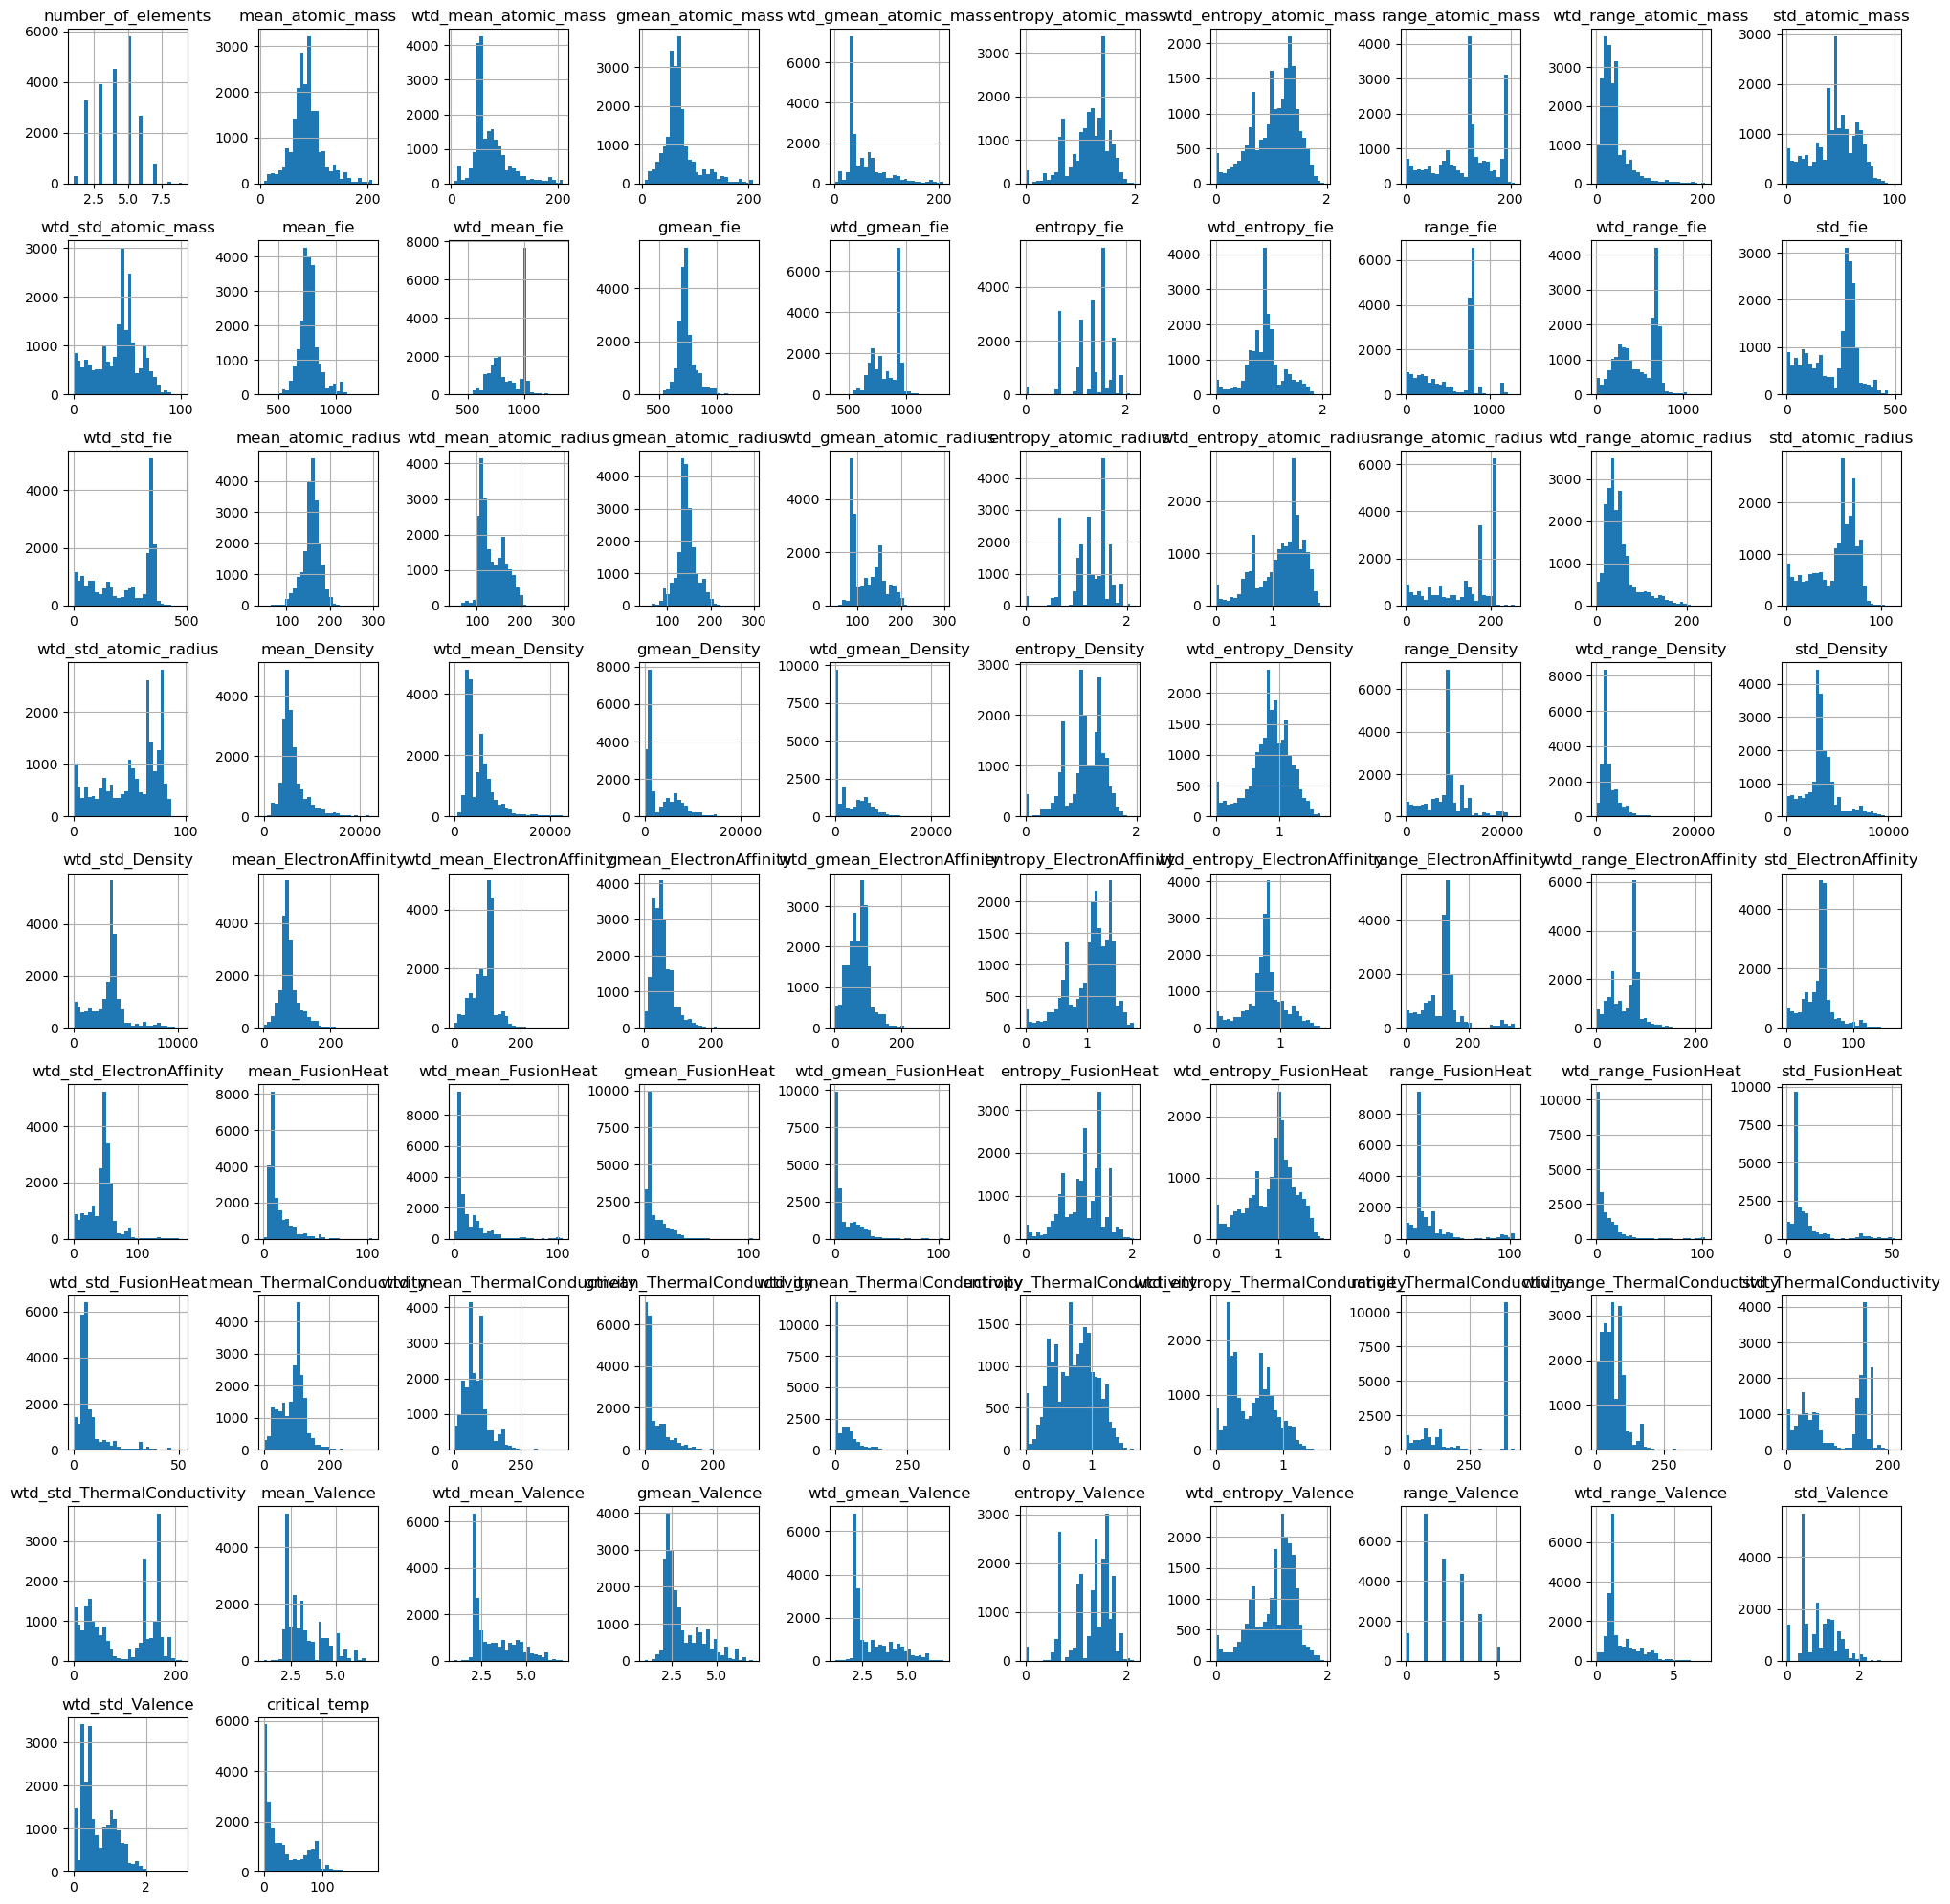

In [3]:
import matplotlib.pyplot as plt

# Plot histograms for each column
data.hist(figsize=(20, 20), bins=30, layout=(9, 10))  # Adjust layout dimensions
plt.tight_layout()
plt.show()


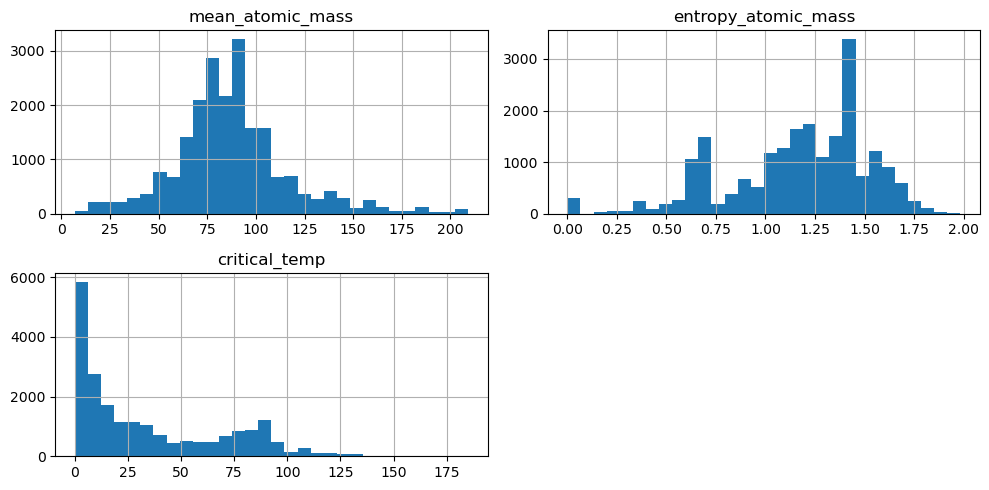

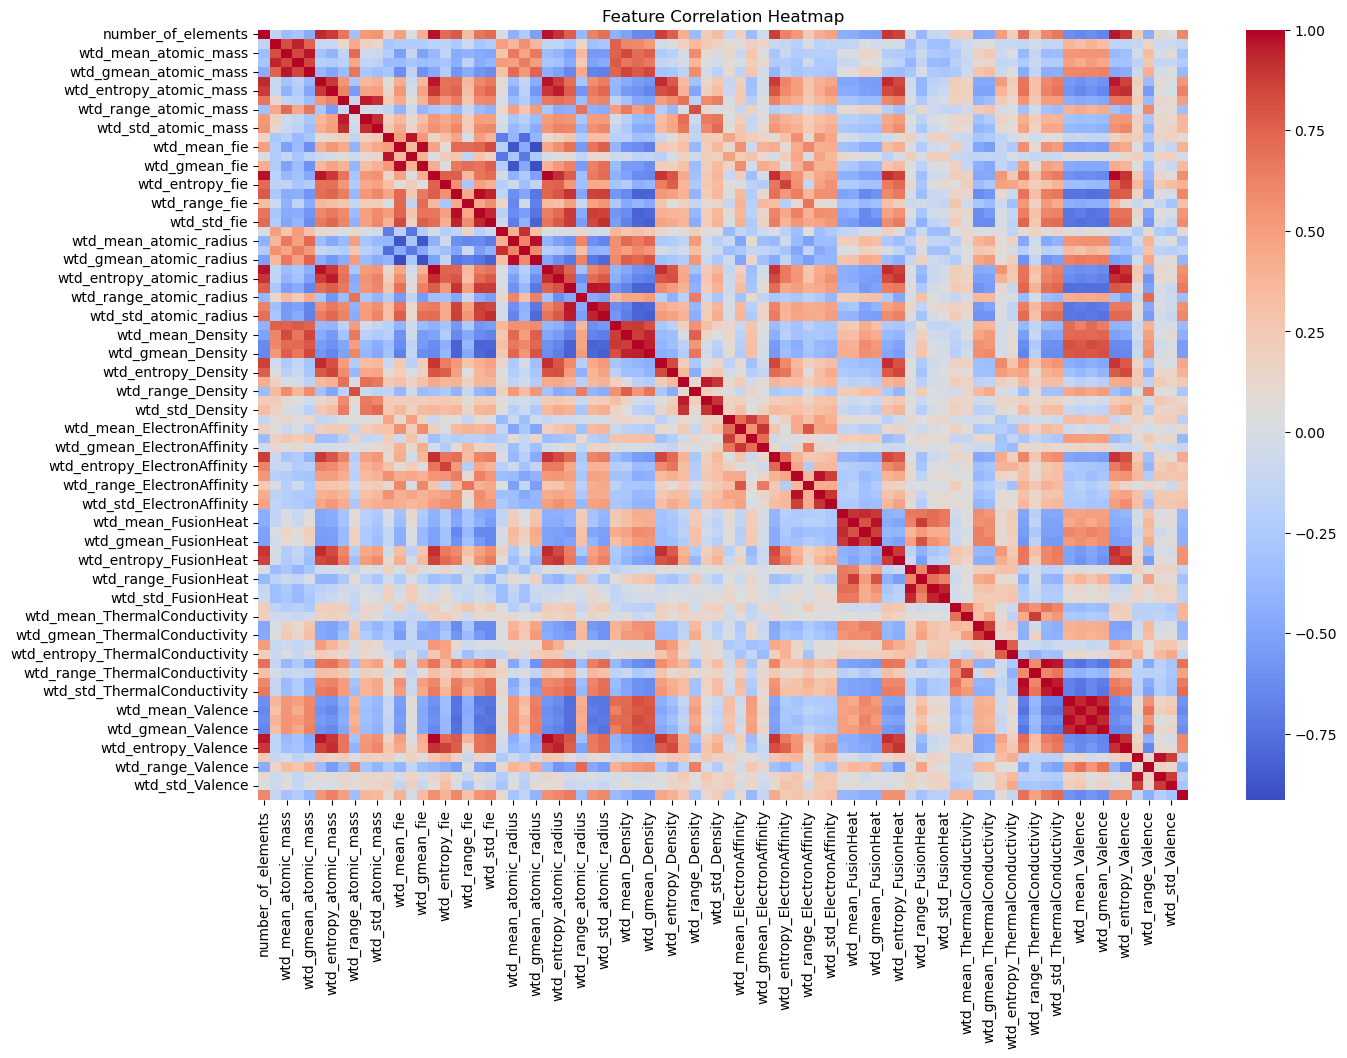

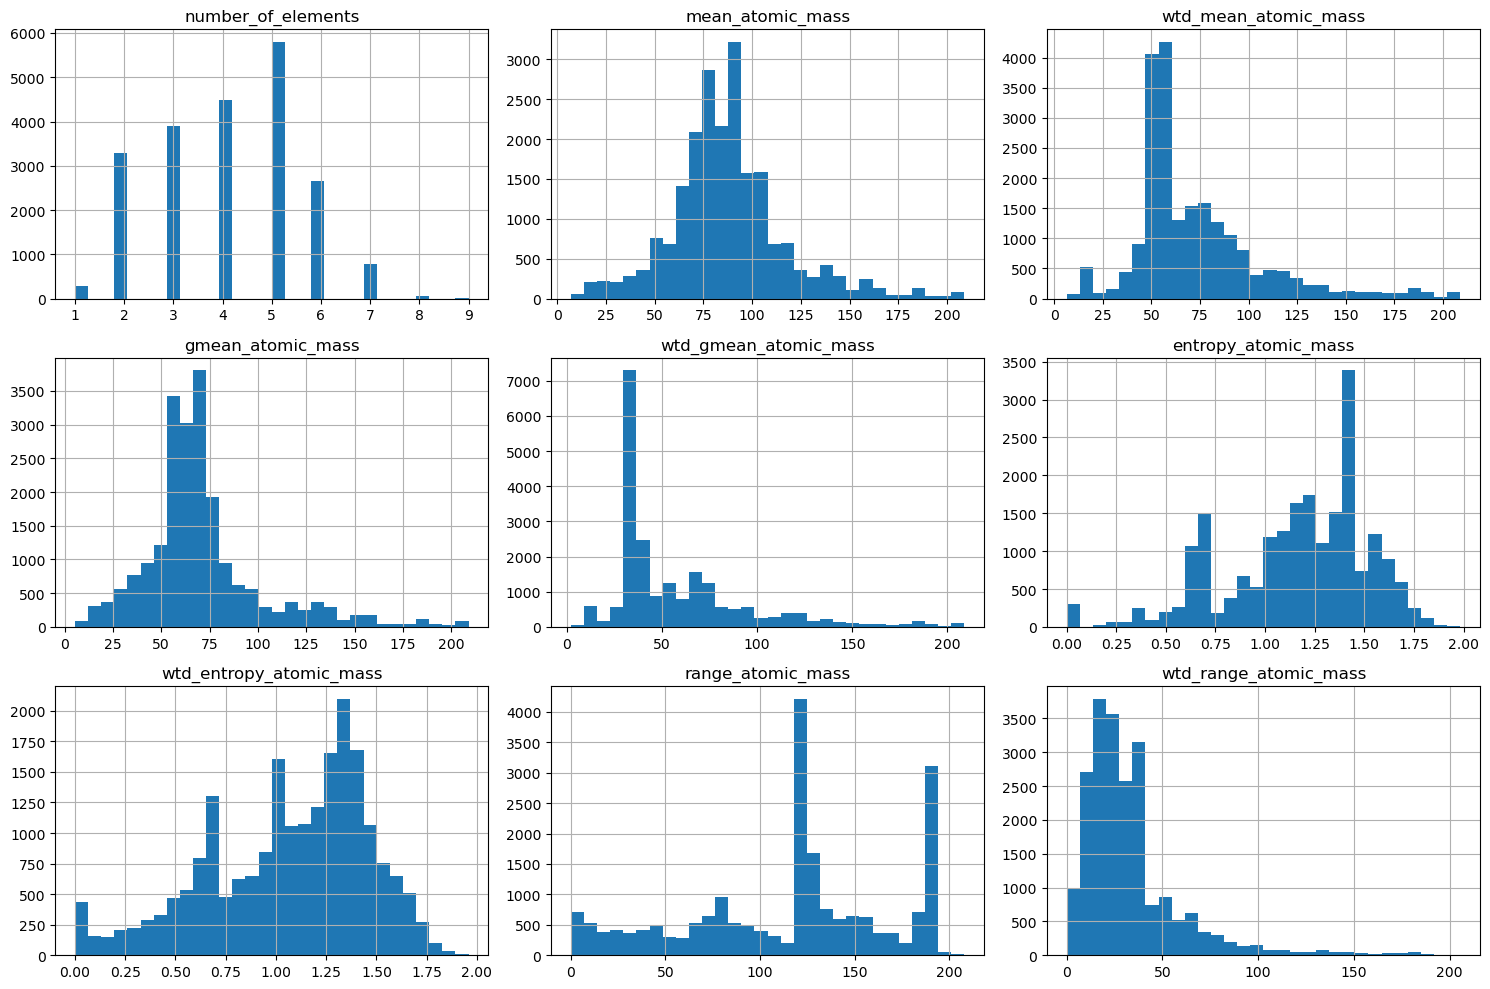

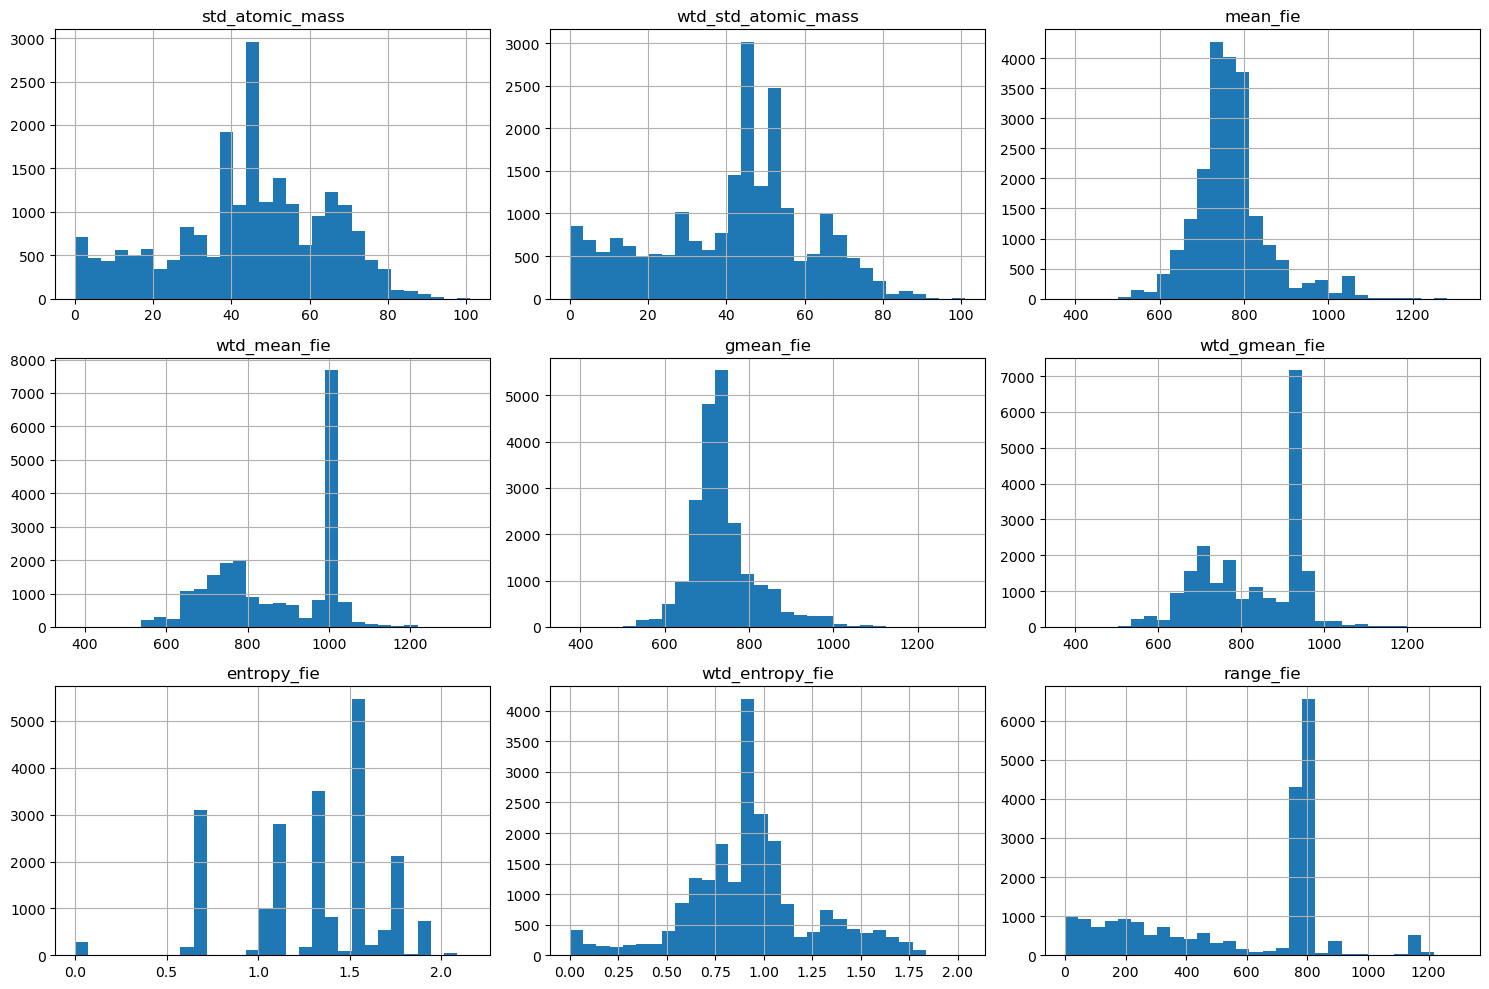

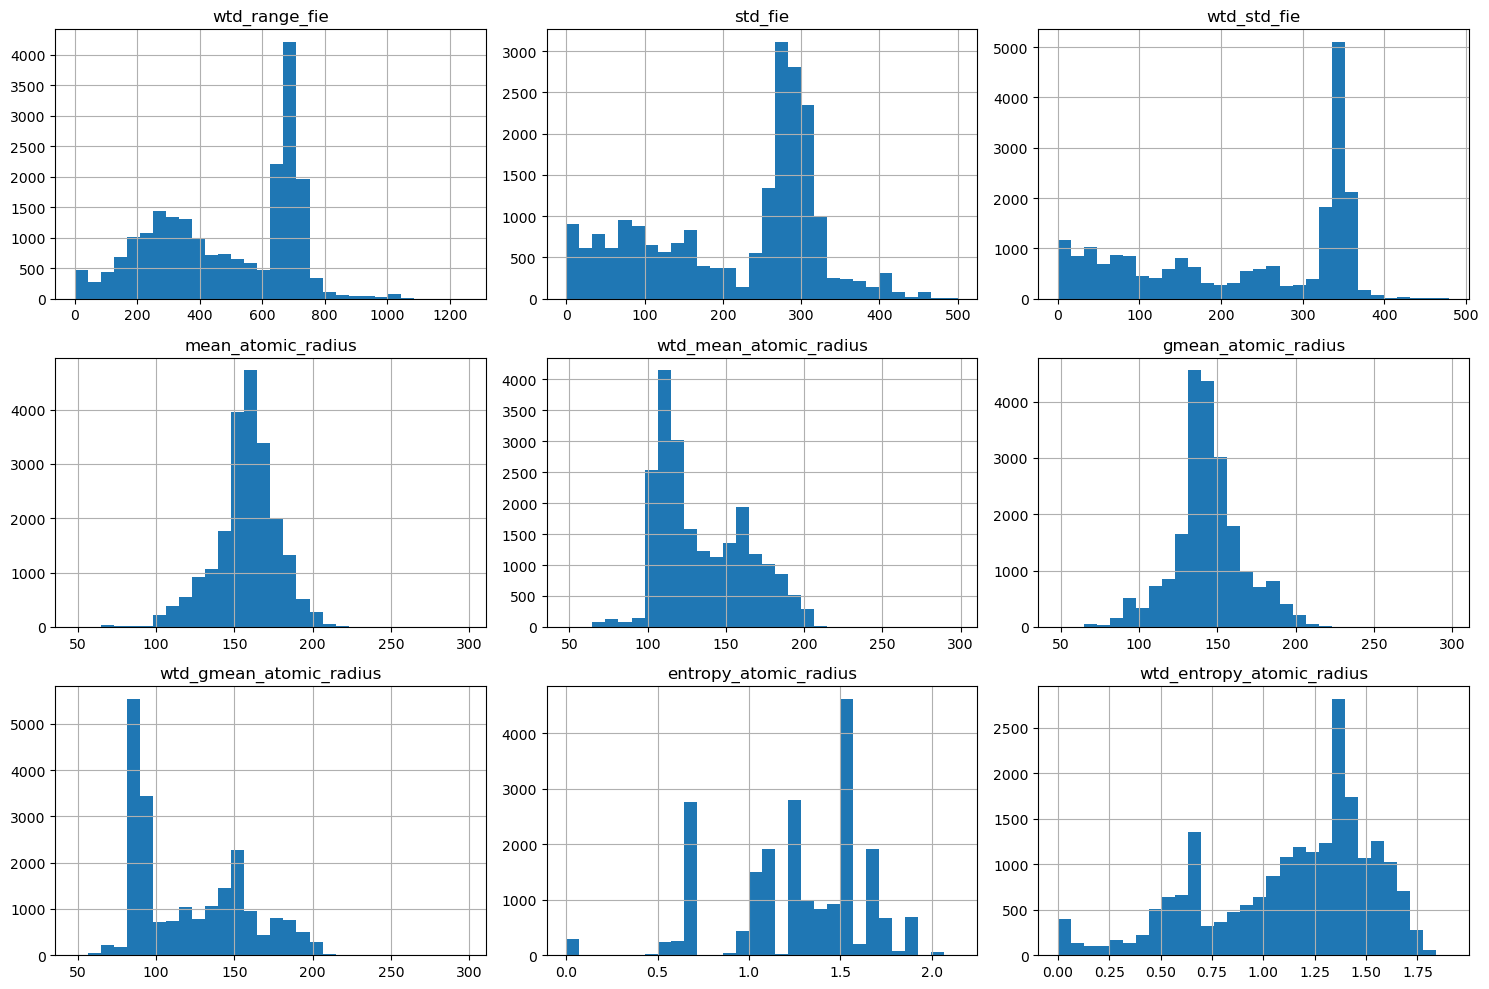

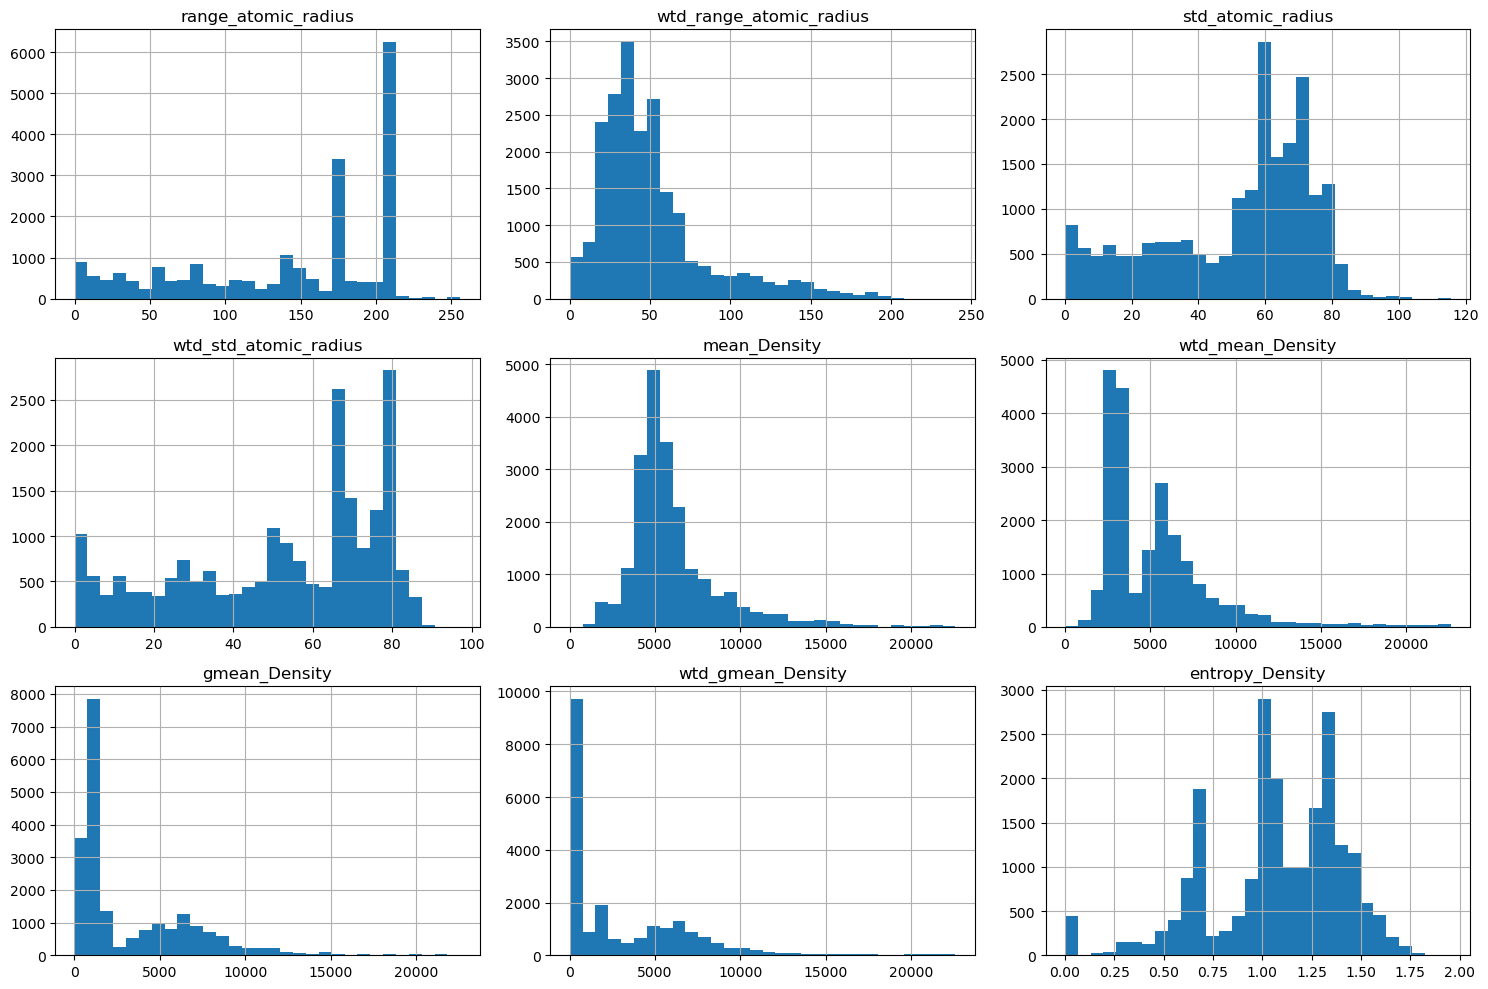

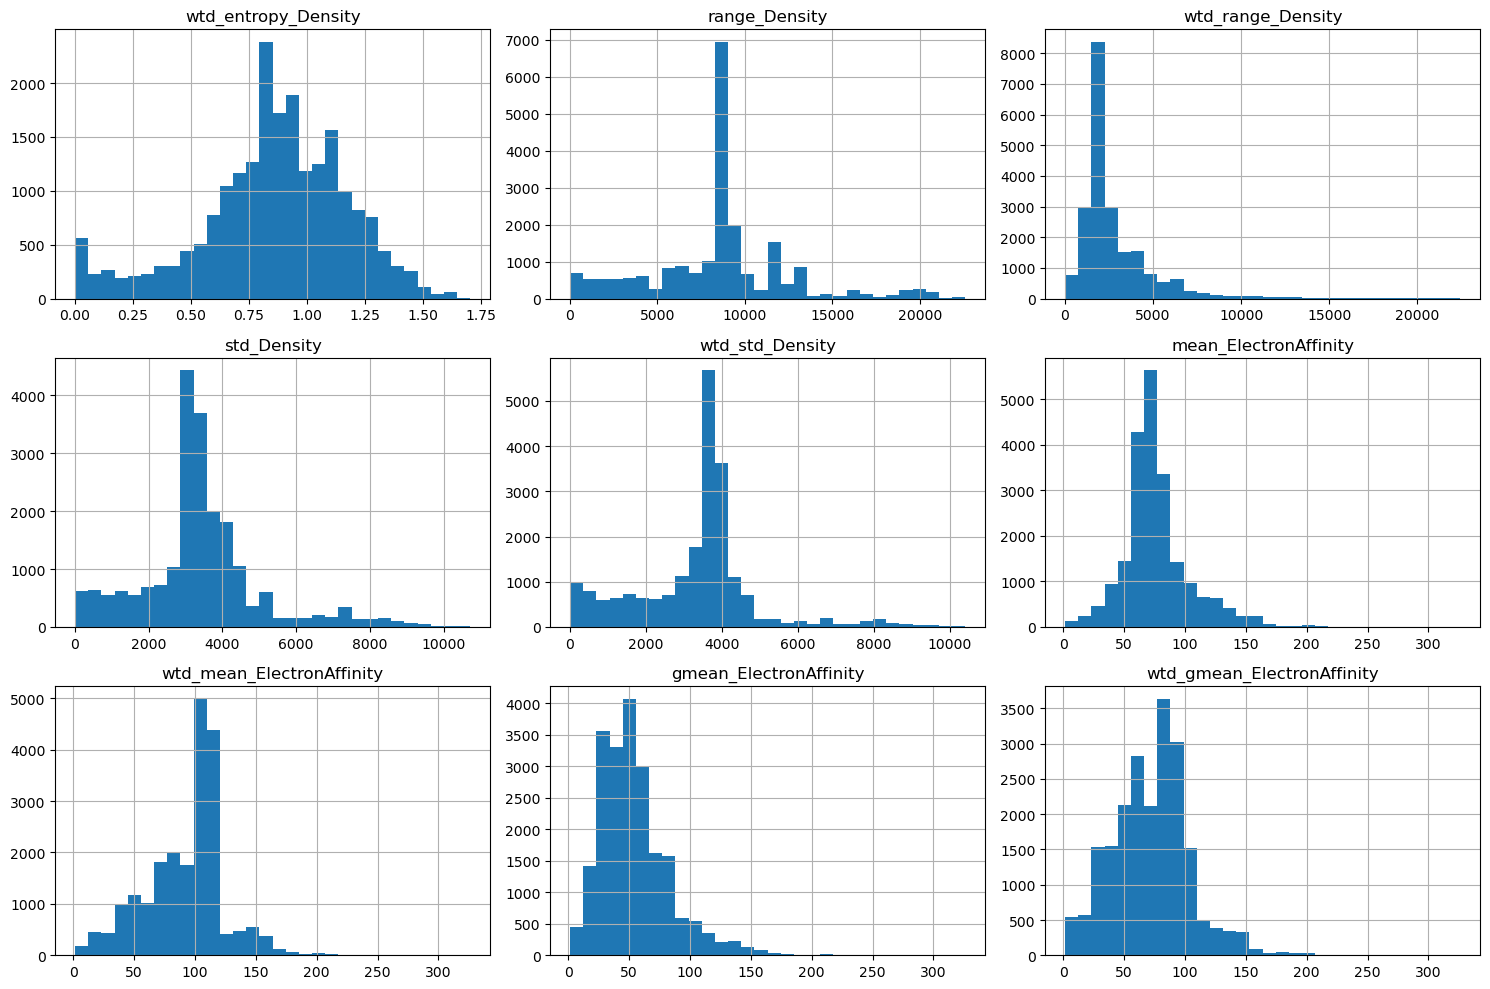

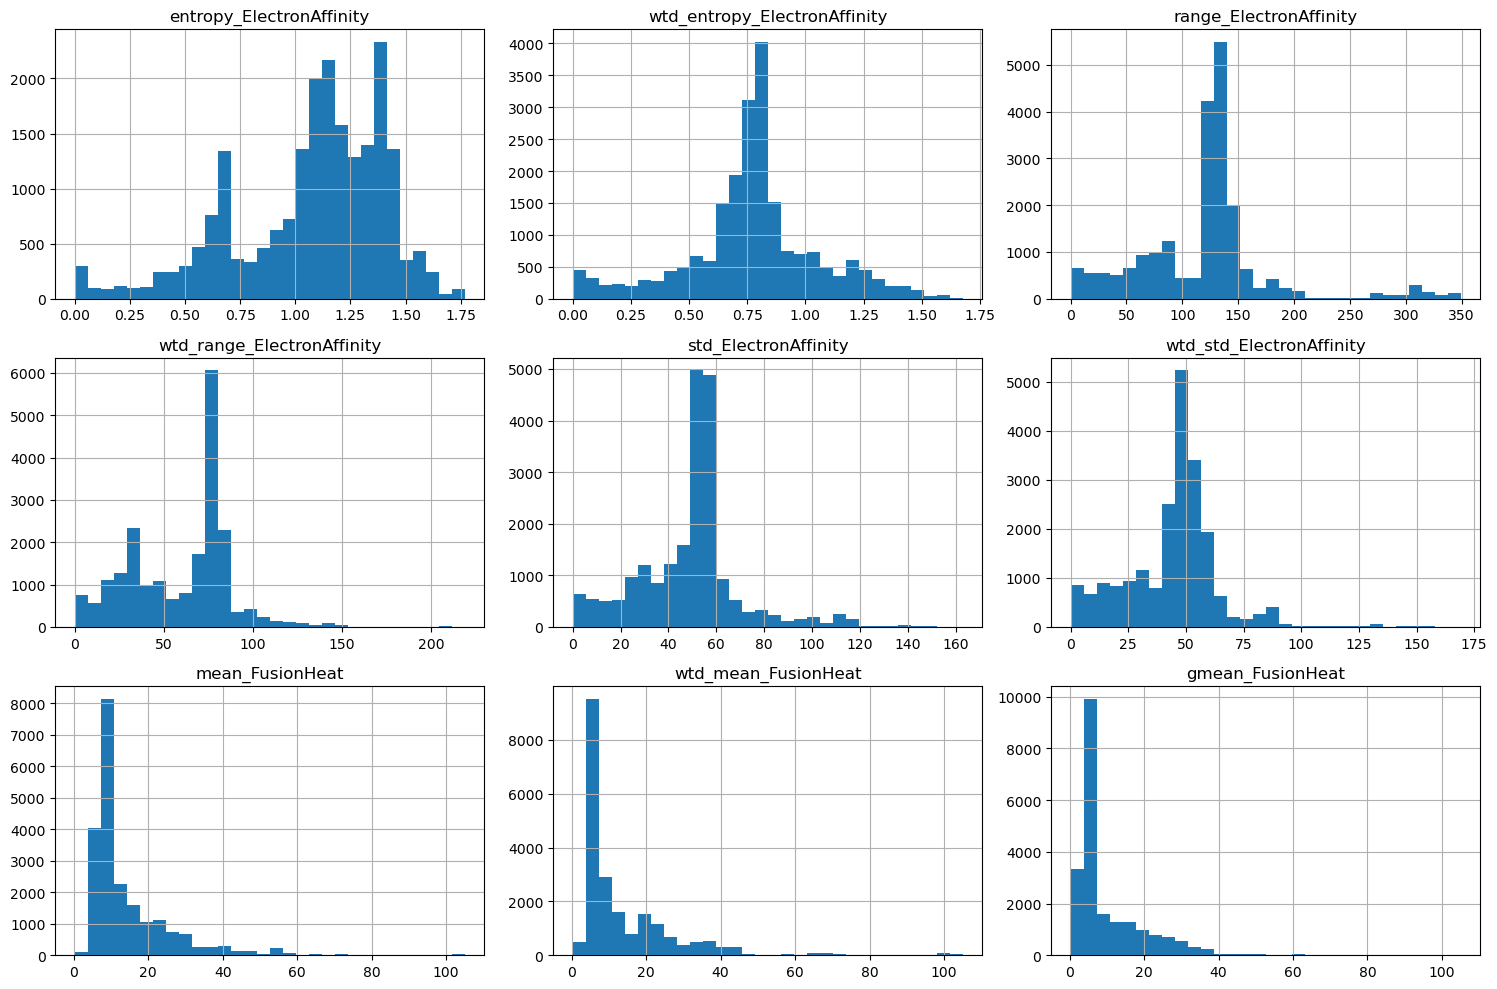

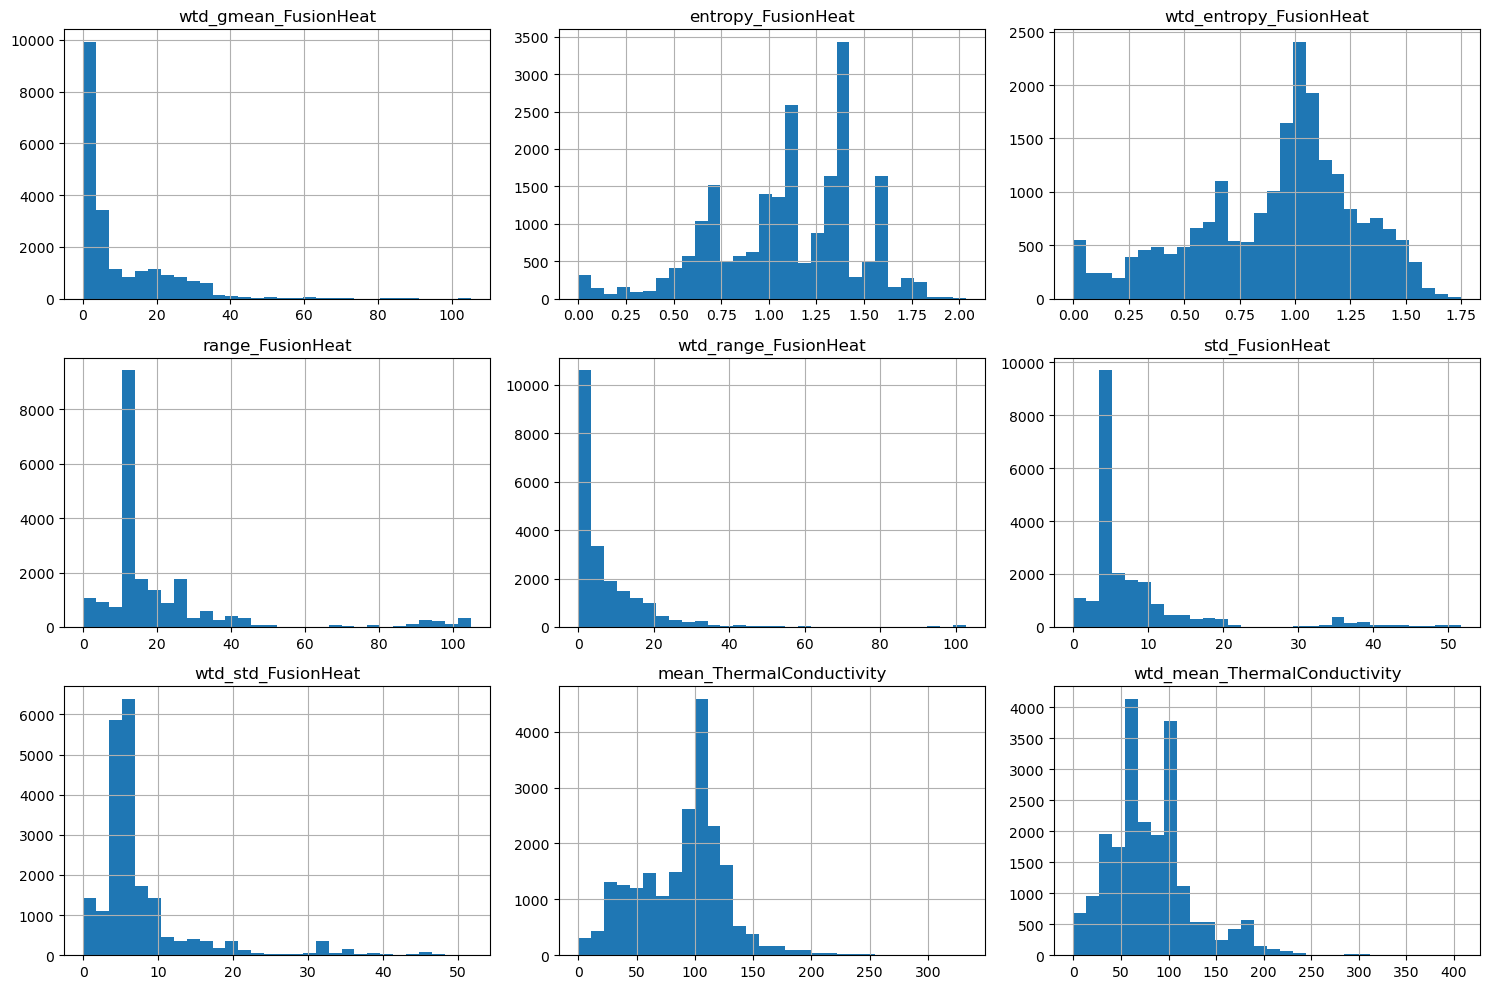

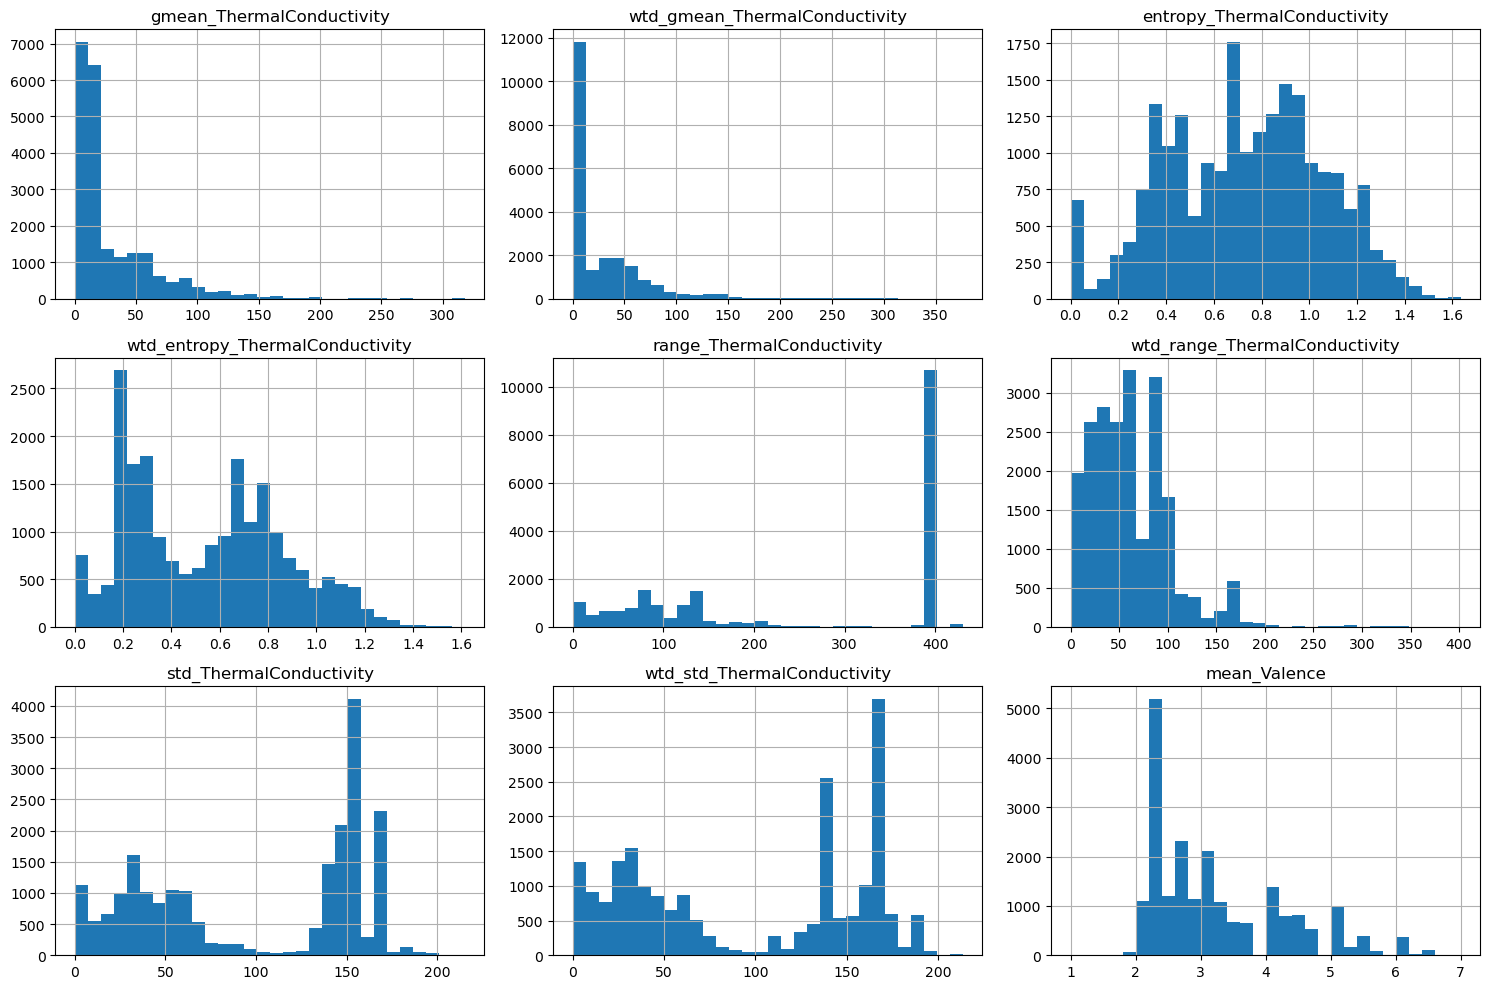

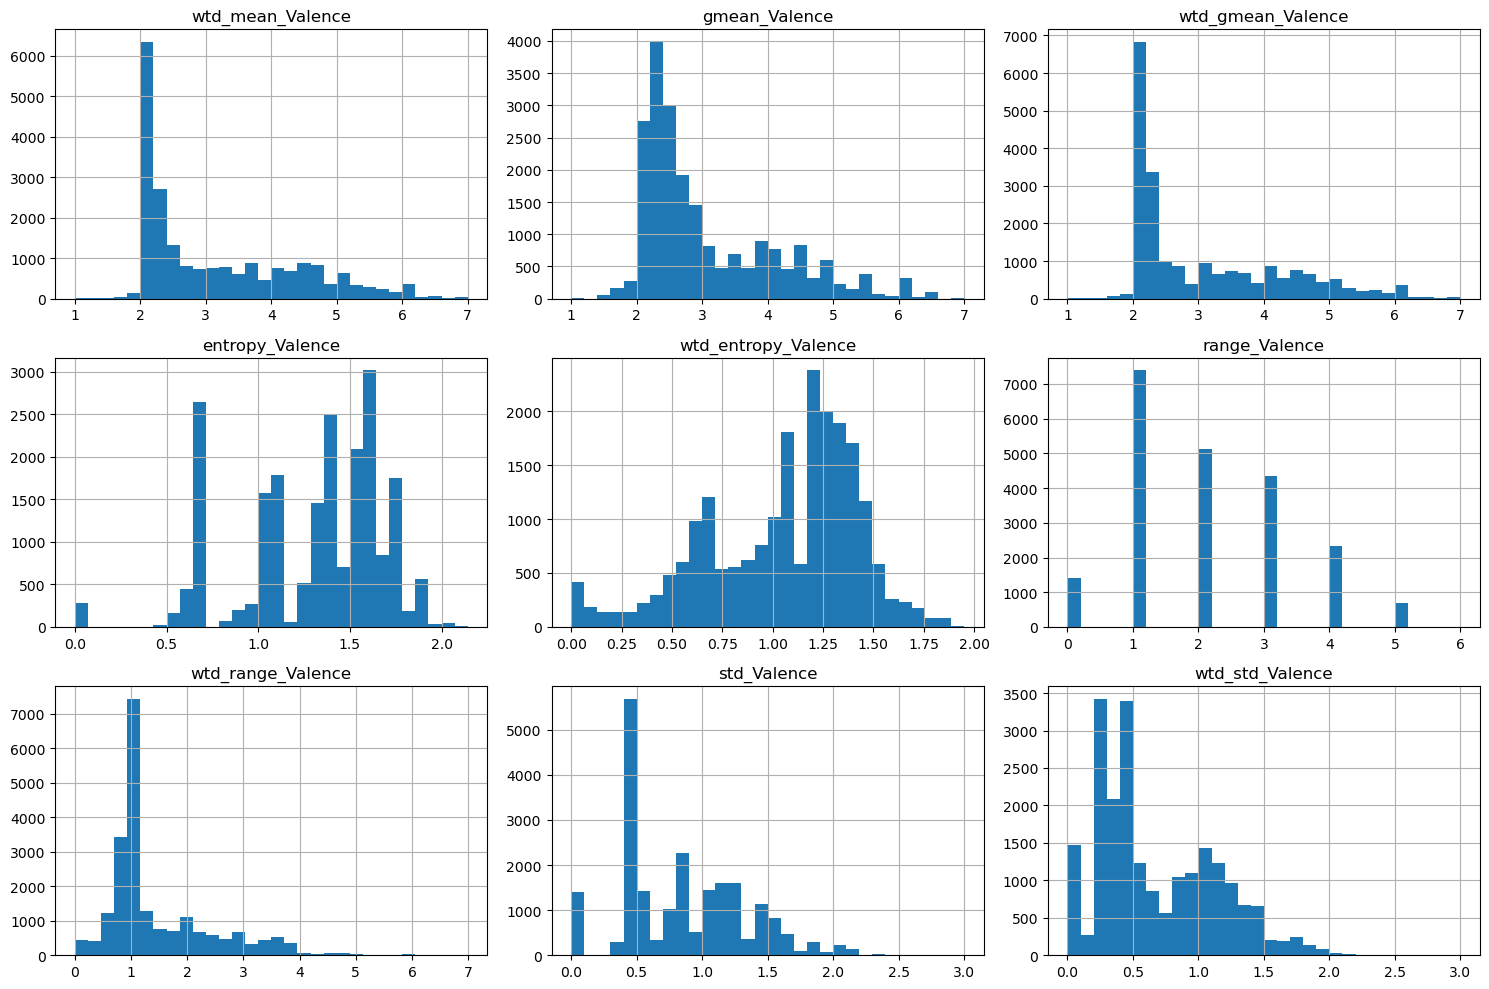

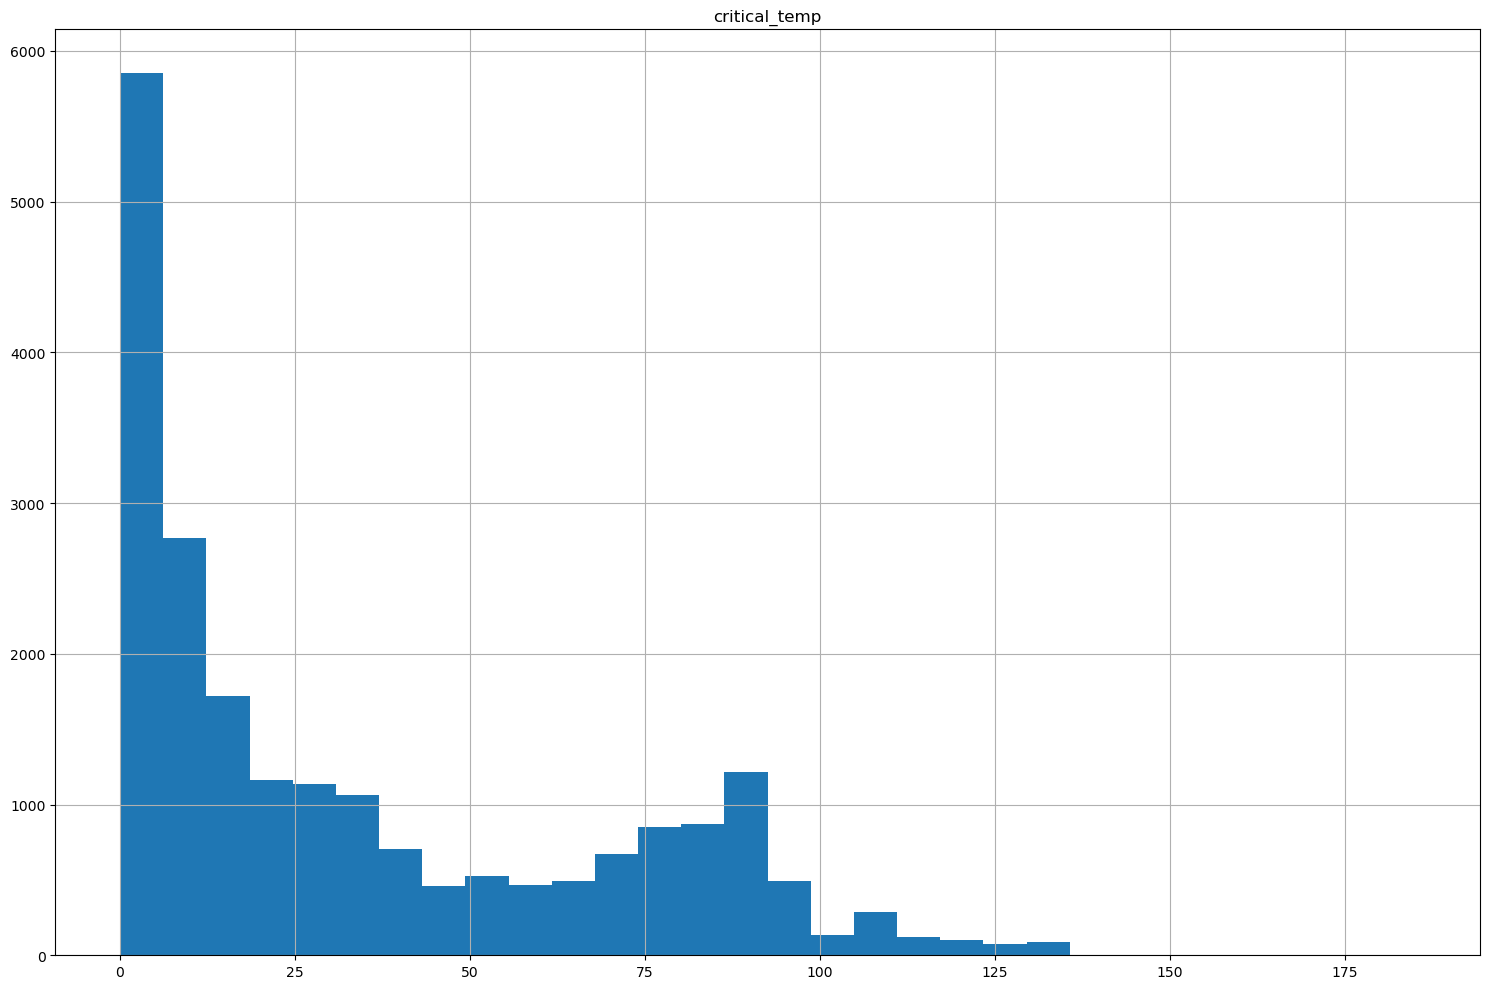

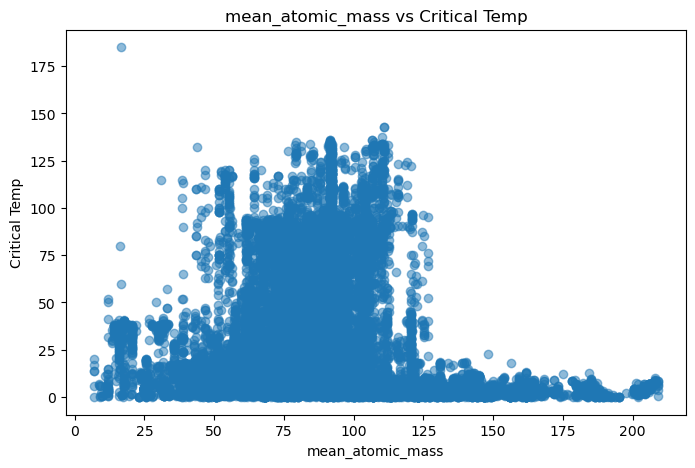

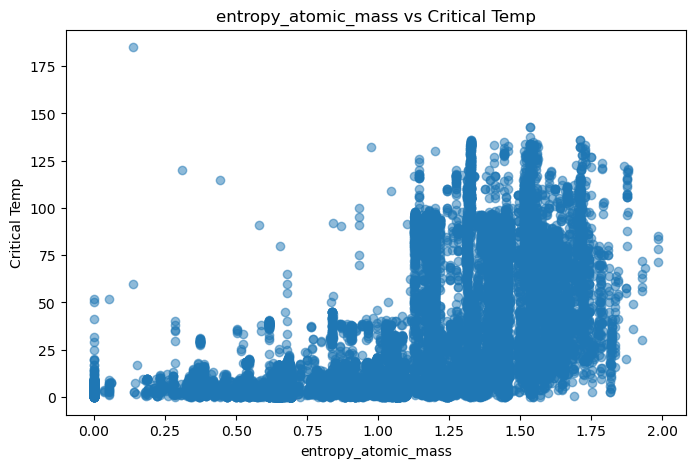

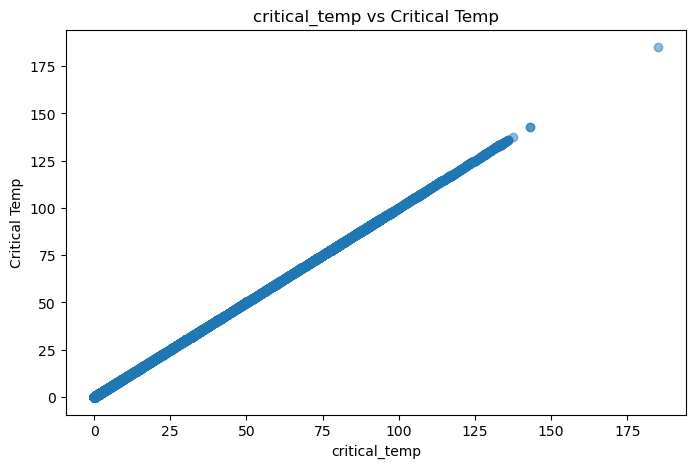

In [4]:
selected_columns = ['mean_atomic_mass', 'entropy_atomic_mass', 'critical_temp']
data[selected_columns].hist(figsize=(10, 5), bins=30)
plt.tight_layout()
plt.show()


# pairwise: 
import seaborn as sns

plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# ITERATE THROUGH BATCHES: 
batch_size = 9  # Adjust based on desired number of subplots per figure
columns = data.columns

for i in range(0, len(columns), batch_size):
    data[columns[i:i+batch_size]].hist(figsize=(15, 10), bins=30)
    plt.tight_layout()
    plt.show()


# FOCUS ON RELATION SHIPS QWITH TARGET VARIABLE: 
for column in ['mean_atomic_mass', 'entropy_atomic_mass', 'critical_temp']:
    plt.figure(figsize=(8, 5))
    plt.scatter(data[column], data['critical_temp'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Critical Temp')
    plt.title(f'{column} vs Critical Temp')
    plt.show()



Step 2: Splitting Data
Tasks
Define features (X) and target (y).
Split the dataset into training and testing subsets.

- Pre-Session Questions
    1. Why is it important to split the data into training and testing subsets?
    2. What would happen if the dataset was not properly shuffled during splitting?

In [5]:
# Define features and target
target_column = 'critical_temp'
X = normalized_data.drop(columns=[target_column])
y = normalized_data[target_column]

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display split summary
print(f"Training set size (X_train): {X_train.shape}, Target size (y_train): {y_train.shape}")
print(f"Testing set size (X_test): {X_test.shape}, Target size (y_test): {y_test.shape}")


Training set size (X_train): (17010, 81), Target size (y_train): (17010,)
Testing set size (X_test): (4253, 81), Target size (y_test): (4253,)


In [6]:
# Define features and target
target_column = 'critical_temp'
if target_column in normalized_data.columns:
    print(f"Target column '{target_column}' found.")
else:
    print(f"Target column '{target_column}' not found in data.")

# Define features and target
X = normalized_data.drop(columns=[target_column])
y = normalized_data[target_column]

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display split summary
print(f"Training set size (X_train): {X_train.shape}, Target size (y_train): {y_train.shape}")
print(f"Testing set size (X_test): {X_test.shape}, Target size (y_test): {y_test.shape}")


Target column 'critical_temp' found.
Training set size (X_train): (17010, 81), Target size (y_train): (17010,)
Testing set size (X_test): (4253, 81), Target size (y_test): (4253,)


In [7]:
X_train.shape


(17010, 81)

In [8]:
print(normalized_data.columns)


Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

- Step 3: Building the Linear Regression Model
- Tasks
    1. Train the model on the training set.
    2. Use the model to predict on the test set.
    3. Evaluate model performance using Mean Squared Error (MSE).

Pre-Session Questions
    1. How does the Mean Squared Error (MSE) measure model performance?
    2. Why is R² an important metric for evaluating linear regression models?

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.25739872672526304
R^2 Score: 0.7376312737139079


- Step 4: Interpreting Results
- Tasks
    1. Extract coefficients and intercept.
    2. Identify the most important features for prediction.

- Pre-Session Questions
    1. What do the coefficients of a linear regression model tell us about feature importance?
    2. How can scientists use this information to design new materials?

In [10]:
# Extract coefficients and intercept
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

print("Feature Importances:\n", coefficients)
print(f"Intercept: {model.intercept_}")


Feature Importances:
                     Feature  Coefficient
22   wtd_mean_atomic_radius     2.428615
75          entropy_Valence     0.836417
49     std_ElectronAffinity     0.824856
72         wtd_mean_Valence     0.796416
1          mean_atomic_mass     0.760028
..                      ...          ...
52      wtd_mean_FusionHeat    -0.852793
74        wtd_gmean_Valence    -0.918548
2      wtd_mean_atomic_mass    -0.941827
15              entropy_fie    -1.121941
24  wtd_gmean_atomic_radius    -2.602856

[81 rows x 2 columns]
Intercept: 0.0009585074834734461


- Step 5: Visualizing Results
- Tasks
    1. Plot the residuals. 
    2. Create a predicted vs actual scatterplot

    

- Pre-Session Questions
    1. How can residual plots indicate model accuracy and potential bias?
    2. What would a perfect Predicted vs. Actual scatterplot look like?

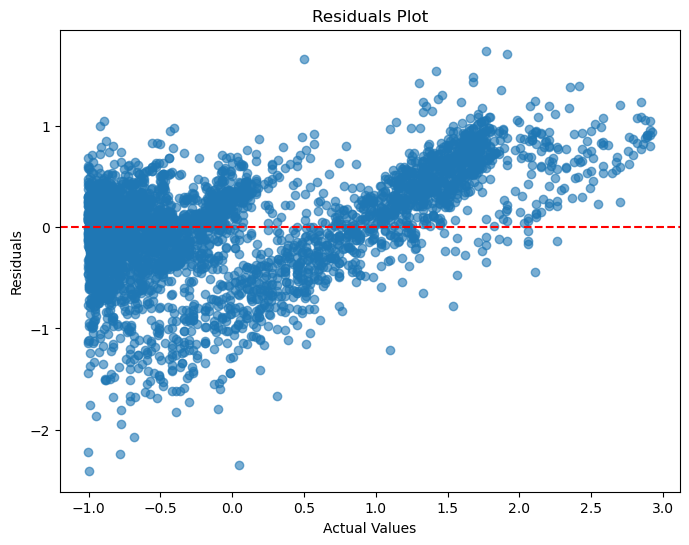

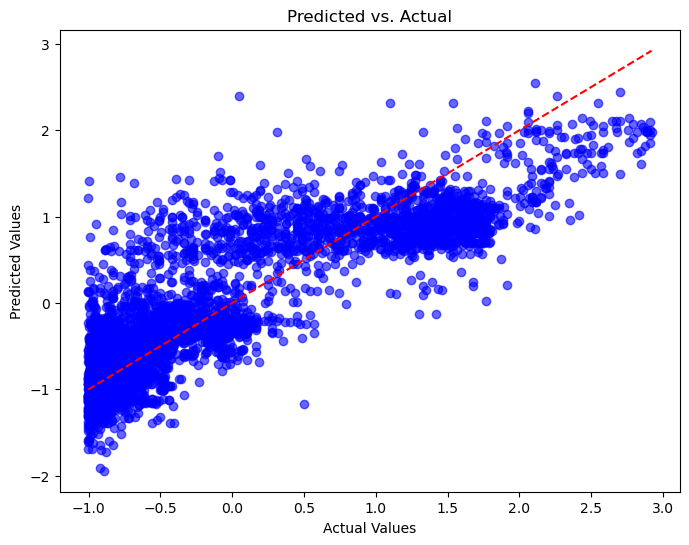

In [11]:
import matplotlib.pyplot as plt

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

# Predicted vs. Actual scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Predicted vs. Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


- Step 6: Final Deliverables
- Case Study Report

- Key Sections:
    - Problem statement and data description.
    - Steps taken for preprocessing, modeling, and evaluation.
    - Summary of findings and recommendations.
- Code :
```python
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('superconductors_data.csv')

# Display basic dataset information
print(data.info())
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Normalize the dataset
scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Define features and target
target_column = 'critical_temp'
X = normalized_data.drop(columns=[target_column])
y = normalized_data[target_column]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Extract coefficients and intercept
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print("Feature Importances:\n", coefficients)
print(f"Intercept: {model.intercept_}")

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

# Predicted vs. Actual scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Predicted vs. Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
```

- Discussion
    - Relate feature importance to scientific insights about superconductors.


### Key Observations:
1. **Model Performance:**
   - **R² Score:** 0.7376 indicates that approximately 73.76% of the variance in `critical_temp` is explained by the features. This is a solid start but leaves room for improvement.
   - **Mean Squared Error (MSE):** 0.2574 reflects the average squared difference between actual and predicted critical temperatures. Lower MSE is preferable, so this result suggests room for tuning.

2. **Feature Importance:**
   - **Top Contributors:**
     - **Positive:** `wtd_mean_atomic_radius` (2.43), `entropy_Valence` (0.84), `std_ElectronAffinity` (0.82) indicate that these features have a strong positive relationship with superconducting critical temperature.
     - **Negative:** `wtd_gmean_atomic_radius` (-2.60), `entropy_fie` (-1.12) highlight features negatively correlated with critical temperature. These may indicate structural properties that reduce superconducting potential.
   - **Scientific Insight:** Atomic and electron-related properties dominate the feature importance, aligning with known material science theories on superconductivity.

3. **Visualizations:**
   - **Residual Plot:** Residuals are scattered around zero, but heteroscedasticity (variance changes across the range of predicted values) is evident, suggesting the model may benefit from addressing this with advanced techniques or transformations.
   - **Predicted vs. Actual Plot:** Predictions align closely with actual values, but deviations at higher values suggest the model struggles with extremes.

---

### next xteps: (maybe)   

1. **Feature Engineering:**
   - Create interaction terms between features (e.g., `mean_atomic_mass` × `mean_ElectronAffinity`).
   - Experiment with polynomial features for non-linear relationships.

2. **Advanced Models:**
   - Try Random Forest, Gradient Boosting, or Neural Networks for capturing complex relationships.
   - Use cross-validation for hyperparameter tuning to avoid overfitting.

3. **Transformations:**
   - Log-transform the target or specific features to stabilize variance and improve heteroscedasticity.

4. **Additional Data Insights:**
   - Explore correlations and remove multicollinear features that may distort predictions.
   - Perform clustering to group materials with similar properties, enhancing interpretability.

5. **Validation Metrics:**
   - Introduce additional metrics like Mean Absolute Error (MAE) and Adjusted R² to evaluate the model comprehensively.

---

### Deliverables:
1. **Updated Code:**
   - Incorporate polynomial features, log-transformation, and advanced models like Random Forest.
2. **Case Study Report:**
   - Update the discussion section with insights from advanced model performance and feature engineering.
3. **Visual Enhancements:**
   - Generate heatmaps for feature correlations.
   - Add error distributions for residual analysis.

